# Library loading.....

In [ ]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
import os
import cv2
from matplotlib import pyplot
#from mrcnn.utils import Dataset
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,DepthwiseConv2D,SeparableConv2D,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.utils import to_categorical
# from keras.np_utils import to_categorical
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/datasets/super_augmented.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/super_augmented/7749.jpg  
 extracting: /content/super_augmented/7749.txt  
  inflating: /content/super_augmented/775.jpg  
 extracting: /content/super_augmented/775.txt  
  inflating: /content/super_augmented/7750.jpg  
 extracting: /content/super_augmented/7750.txt  
  inflating: /content/super_augmented/7751.jpg  
 extracting: /content/super_augmented/7751.txt  
  inflating: /content/super_augmented/7752.jpg  
 extracting: /content/super_augmented/7752.txt  
  inflating: /content/super_augmented/7753.jpg  
 extracting: /content/super_augmented/7753.txt  
  inflating: /content/super_augmented/7754.jpg  
 extracting: /content/super_augmented/7754.txt  
  inflating: /content/super_augmented/7755.jpg  
 extracting: /content/super_augmented/7755.txt  
  inflating: /content/super_augmented/7756.jpg  
 extracting: /content/super_augmented/7756.txt  
  inflating: /content/super_augmented/7757.jpg  
 extracting: /conten

extraction all coordinates of images and class name

import dataset

loading segmented dataset

In [ ]:
# path=("D:/smartparking dataset/empty/alldataset2/")
# path=("D:/smartparking dataset/empty/augmented_dataset/")
path=('/content/super_augmented/')

for pr in range(0,20352): #289 #20352

  image = cv2.imread(path+str(pr)+'.jpg')
  img = cv2.resize(image, (71,71))

  # cv2.imwrite('/content/'+str(34)+'.jpg',hist_eq)
  # top, bottom = 5,5
  # left, right = 5,5
  # image = cv2.copyMakeBorder(hist_eq, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0,0,0])
  # img = cv2.resize(image, (50,50))
  alldatasetimages_list1.append(img)

  txt = open(path+str(pr)+'.txt',"r")

  lbl = txt.readlines()
  # print(len(lbl))
  # print(len(lbl))
  # print(lbl)
  # lbl = txt.readlines()
  # print(lbl[0])
  alldatasetlabels_list1.append(int(lbl[0]))
  txt.close()

error: ignored

## **augmentation**

1.   *rotation, width_suffles*
2.   *equlization histogram*




2


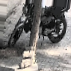

2


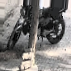

2


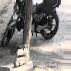

2


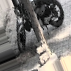

1


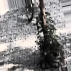

1


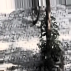

1


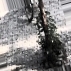

1


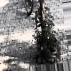

1


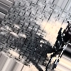

1


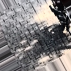

1


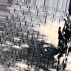

1


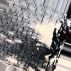

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
for he in range(0,3):
  img_yuv = cv2.cvtColor(alldatasetimages_list[he],cv2.COLOR_BGR2YUV)

  # apply histogram equalization
  img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
  hist_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
  hlbl = list()
  hlbl.append(alldatasetlabels_list2[he])

#   # print(hist_eq.shape)
  img = img_to_array(hist_eq)

    # prepare pixel data
  img = np.expand_dims(img, axis = 0)


  datagen = ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2)#,width_shift_range=0.2,height_shift_range=0.2
  ii=0

  for X_batch, y_batch in datagen.flow(img,hlbl , batch_size=1):
      for i in range(0, 1):
          pyplot.subplot(330 + 1 + i)
          pyplot.axis('off')
          pyplot.title('ori : '+str(y_batch[i]))
          pyplot.imshow(X_batch[i].astype('uint8'))
          # augmented_images_list.append(X_batch[i].astype('uint8'))
          # augmented_labels_list.append(y_batch[i])
      pyplot.show()
      if ii==95:

          break
      ii=ii+1
      break

spliting dataset into two phase, traing and testing

In [ ]:
x1_train, x_test, y1_train, y_test = train_test_split(alldatasetimages_list1,
                                                    alldatasetlabels_list1,test_size=0.2)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x1_train,
                                                    y1_train,test_size=0.25)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(x_val))

12373
4125
4125


rescaling

In [ ]:
def load_dataset(y_train, y_test):
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return y_train, y_test
y_train, y_test = load_dataset(y_train, y_test)

In [ ]:
def prep_pixels(test):
    # convert from integers to floats

    test = asarray(test)

    test_norm = test.astype('float32')
    # normalize to range 0-1

    test_norm = test_norm / 255.0
    # return normalized images
    return test_norm

x_test = prep_pixels(x_test)

# for xn in range(len(x_test)):
#     x_test1 = prep_pixels(x_test[xn])

In [ ]:

def prep_pixels1(train):
    # convert from integers to floats
    train = asarray(train)

    train_norm = train.astype('float32')

    # normalize to range 0-1
    train_norm = train_norm / 255.0

    # return normalized images
    return train_norm

x_train = prep_pixels1(x_train)
# for xn in range(len(x_train)):
#     print(xn)
#     x_train1 = prep_pixels1(x_train[xn])

In [ ]:
print(x_test.shape)

(4125, 71, 71, 3)


## train model

In [ ]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(71, 71, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# vgg16_model.summary()


vg16t_model = Sequential()

for i, layer in enumerate(vgg16_model.layers):
#     print(i, layer.name, layer.trainable)
    if i<=18:
        vg16t_model.add(layer)
vg16t_model.add(Flatten())
vg16t_model.add(Dense(64))
vg16t_model.add(Dense(64))

# vg16t_model.add(Dense(64))
# vg16t_model.add(Activation('relu'))
# vg16t_model.add(Dropout(0.5))
vg16t_model.add(Dense(3,activation='softmax'))
# vg16t_model.trainable=False
vg16t_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 71, 71, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 71, 71, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 35, 35, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 35, 35, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 35, 35, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 17, 17, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 17, 17, 256)       2

In [ ]:
vg16t_model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
history1 = vg16t_model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15,batch_size=128)

Epoch 1/15
97/97 [==============================] - 42s 238ms/step - loss: 1.1300 - accuracy: 0.7816 - val_loss: 0.2133 - val_accuracy: 0.9205
Epoch 2/15
97/97 [==============================] - 19s 198ms/step - loss: 0.1594 - accuracy: 0.9446 - val_loss: 0.1278 - val_accuracy: 0.9503
Epoch 3/15
97/97 [==============================] - 19s 191ms/step - loss: 0.1056 - accuracy: 0.9648 - val_loss: 0.0432 - val_accuracy: 0.9852
Epoch 4/15
97/97 [==============================] - 20s 204ms/step - loss: 0.1310 - accuracy: 0.9543 - val_loss: 0.1523 - val_accuracy: 0.9392
Epoch 5/15
97/97 [==============================] - 20s 207ms/step - loss: 0.0642 - accuracy: 0.9762 - val_loss: 0.0184 - val_accuracy: 0.9915
Epoch 6/15
97/97 [==============================] - 20s 206ms/step - loss: 0.0101 - accuracy: 0.9960 - val_loss: 7.5037e-04 - val_accuracy: 1.0000
Epoch 7/15
97/97 [==============================] - 19s 194ms/step - loss: 3.6079e-04 - accuracy: 0.9998 - val_loss: 3.4501e-05 - val_accu

In [ ]:
test_loss, test_acc = vg16t_model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

128/128 [==============================] - 3s 22ms/step - loss: 1.6458e-06 - accuracy: 1.0000
test_acc: 1.0


In [ ]:
vg16t_model.save('/content/drive/MyDrive/trained_model/parking_smart/pretrained_60%_71x71_vgg16_ori_architecture.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.style.use('ggplot')
    pyplot.figure(figsize=(8,8))
    pyplot.subplot(2,2,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='red', label='test')
    pyplot.legend()
#     pyplot.show()
    # plot accuracy
    pyplot.subplot(2,2,2)
#     pyplot.figure(figsize=(10,6))
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='red', label='test')
    pyplot.legend()
    pyplot.show()

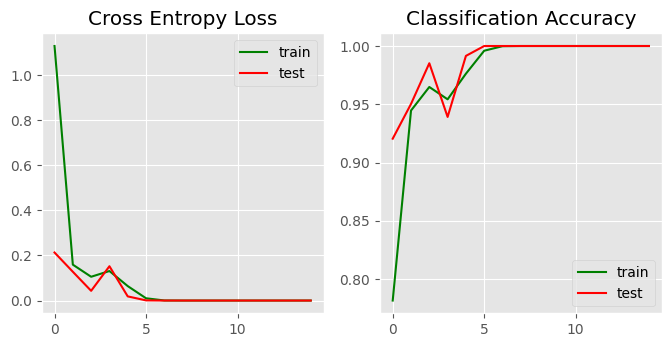

In [ ]:
summarize_diagnostics(history1)

# Xception model

In [ ]:
inception_model=Xception(weights='imagenet',input_shape=(71,71, 3),include_top=False)

In [ ]:

x = inception_model.output
x = Flatten()(x)
predictions = Dense(3, activation='softmax')(x)
model2 = keras.Model(inputs=inception_model.input, outputs=predictions)
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 71, 71, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 35, 35, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 35, 35, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 35, 35, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
model2.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=5,batch_size=128)

Epoch 1/5
96/96 [==============================] - 56s 295ms/step - loss: 0.0212 - accuracy: 0.9925 - val_loss: 0.5038 - val_accuracy: 0.9452
Epoch 2/5
96/96 [==============================] - 26s 266ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 1.2183e-06 - val_accuracy: 1.0000
Epoch 3/5
96/96 [==============================] - 26s 271ms/step - loss: 3.4318e-05 - accuracy: 1.0000 - val_loss: 6.1350e-07 - val_accuracy: 1.0000
Epoch 4/5
96/96 [==============================] - 26s 274ms/step - loss: 3.6931e-06 - accuracy: 1.0000 - val_loss: 1.6814e-07 - val_accuracy: 1.0000
Epoch 5/5
96/96 [==============================] - 26s 274ms/step - loss: 4.3067e-06 - accuracy: 1.0000 - val_loss: 8.6413e-08 - val_accuracy: 1.0000


In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('test_acc:', test_acc)

128/128 [==============================] - 4s 24ms/step - loss: 8.6413e-08 - accuracy: 1.0000
test_acc: 1.0


In [ ]:
model2.save('/content/drive/MyDrive/trained_model/parking_smart/pretrained_xception_ori_architecture.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.figure(figsize=(8,8))
    pyplot.style.use('ggplot')
    pyplot.subplot(2,2,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='red', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(2,2,2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='red', label='test')
    pyplot.legend()
    pyplot.show()

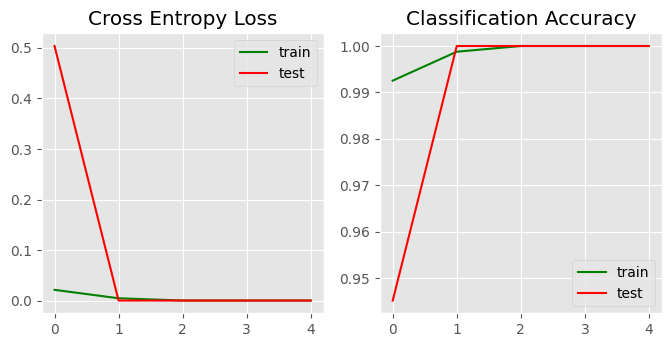

In [ ]:
summarize_diagnostics(history)

In [ ]:
print(model2.summary())

# ResNet50

In [ ]:
resnet50_model=tf.keras.applications.ResNet50(include_top=False,weights="imagenet",
                                           input_shape=(71, 71, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# inputs = keras.Input(shape=(224,224, 3))
x = resnet50_model.output
# let's add a fully-connected layer
# x= Flatten(name="flatten")(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
x= Dense(3, activation='softmax')(x)

# this is the model we will train
model3 = keras.Model(inputs=resnet50_model.input, outputs=x)

In [ ]:
model3.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=128)

Epoch 1/30
97/97 [==============================] - 59s 266ms/step - loss: 0.0846 - accuracy: 0.9835 - val_loss: 263788752.0000 - val_accuracy: 0.7064
Epoch 2/30
97/97 [==============================] - 22s 226ms/step - loss: 0.0275 - accuracy: 0.9952 - val_loss: 1552.9664 - val_accuracy: 0.7064
Epoch 3/30
97/97 [==============================] - 22s 224ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 2.6093 - val_accuracy: 0.7064
Epoch 4/30
97/97 [==============================] - 22s 222ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 50525.6289 - val_accuracy: 0.7064
Epoch 5/30
97/97 [==============================] - 21s 213ms/step - loss: 0.1557 - accuracy: 0.9802 - val_loss: 4.3149 - val_accuracy: 0.7064
Epoch 6/30
97/97 [==============================] - 21s 215ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 3.9246 - val_accuracy: 0.7064
Epoch 7/30
97/97 [==============================] - 22s 225ms/step - loss: 4.6499e-04 - accuracy: 0.9999 - val_loss: 2.6158 - v

In [ ]:
test_loss, test_acc = model3.evaluate(x_test, y_test)
print('test_acc:', test_acc)

129/129 [==============================] - 3s 22ms/step - loss: 0.0026 - accuracy: 0.9995
test_acc: 0.999515175819397


In [ ]:
# history3.history?

In [ ]:
model3.save('/content/drive/MyDrive/trained_model/parking_smart/pretrained_resnet50_60%_71x71_ori_architecture.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def summarize_diagnostics(history3):
    # plot loss
    pyplot.figure(figsize=(8,8))
    pyplot.style.use('ggplot')
    pyplot.subplot(2,2,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history3.history['loss'], color='green', label='train')
    pyplot.plot(history3.history['val_loss'], color='red', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(2,2,2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history3.history['accuracy'], color='green', label='train')
    pyplot.plot(history3.history['val_accuracy'], color='red', label='test')
    pyplot.legend()
    pyplot.show()

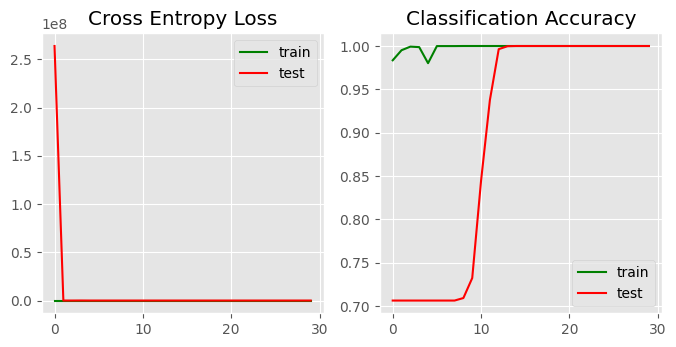

In [ ]:
summarize_diagnostics(history3)

In [ ]:
mobilenet_model = tf.keras.applications.MobileNet(include_top=False,weights="imagenet",
                                           input_shape=(71, 71, 3))

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
x = mobilenet_model.output
# let's add a fully-connected layer
# x= Flatten(name="flatten")(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
x= Dense(3, activation='softmax')(x)

# this is the model we will train
mob_model = keras.Model(inputs=mobilenet_model.input, outputs=x)
mob_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 71, 71, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 36, 36, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 36, 36, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 36, 36, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 36, 36, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 36, 36, 32)        128   

In [ ]:
mob_model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
history4 = mob_model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15,batch_size=128)

Epoch 1/15
97/97 [==============================] - 33s 106ms/step - loss: 0.0375 - accuracy: 0.9895 - val_loss: 0.3056 - val_accuracy: 0.9755
Epoch 2/15
97/97 [==============================] - 8s 83ms/step - loss: 7.7119e-04 - accuracy: 0.9998 - val_loss: 0.0174 - val_accuracy: 0.9973
Epoch 3/15
97/97 [==============================] - 8s 82ms/step - loss: 2.3573e-05 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9995
Epoch 4/15
97/97 [==============================] - 9s 95ms/step - loss: 4.2678e-06 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9995
Epoch 5/15
97/97 [==============================] - 8s 84ms/step - loss: 5.0655e-06 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 0.9995
Epoch 6/15
97/97 [==============================] - 8s 86ms/step - loss: 1.7981e-06 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9995
Epoch 7/15
97/97 [==============================] - 8s 85ms/step - loss: 2.8114e-06 - accuracy: 1.0000 - val_loss: 0.0059 - val_accu

In [ ]:
test_loss, test_acc = mob_model.evaluate(images_list, label_list)
print('test_acc:', test_acc)

263/263 [==============================] - 3s 10ms/step - loss: 3.9058 - accuracy: 0.6143
test_acc: 0.6143129467964172


In [ ]:
mob_model.save('/content/drive/MyDrive/trained_model/parking_smart/pretrained_mobilenet_60%_71x71_ori_architecture.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# alexnet

In [ ]:
alexnet = Sequential()
alexnet.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(71,71,3), activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
alexnet.add(Conv2D(256,(5,5),padding='same',activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
alexnet.add(Conv2D(384,(3,3),padding='same',activation='relu'))
alexnet.add(Conv2D(384,(3,3),padding='same',activation='relu'))
alexnet.add(Conv2D(256,(3,3),padding='same',activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

alexnet.add(Flatten())
alexnet.add(Dense(64, activation='relu'))
alexnet.add(Dropout(0.4))
alexnet.add(Dense(64, activation='relu'))
alexnet.add(Dropout(0.4))
alexnet.add(Dense(3,activation='softmax'))

alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 384)         1

In [ ]:
alexnet.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
history_alexnet = alexnet.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=20,batch_size=128)

Epoch 1/20
97/97 [==============================] - 18s 39ms/step - loss: 0.4846 - accuracy: 0.7711 - val_loss: 0.1551 - val_accuracy: 0.9413
Epoch 2/20
97/97 [==============================] - 3s 34ms/step - loss: 0.1081 - accuracy: 0.9632 - val_loss: 0.0085 - val_accuracy: 0.9961
Epoch 3/20
97/97 [==============================] - 3s 26ms/step - loss: 0.0120 - accuracy: 0.9972 - val_loss: 0.0071 - val_accuracy: 0.9971
Epoch 4/20
97/97 [==============================] - 2s 25ms/step - loss: 0.0151 - accuracy: 0.9964 - val_loss: 0.0144 - val_accuracy: 0.9944
Epoch 5/20
97/97 [==============================] - 2s 25ms/step - loss: 0.0137 - accuracy: 0.9965 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 6/20
97/97 [==============================] - 2s 24ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 6.9825e-04 - val_accuracy: 0.9998
Epoch 7/20
97/97 [==============================] - 2s 23ms/step - loss: 9.1690e-04 - accuracy: 0.9998 - val_loss: 0.0010 - val_accuracy: 0.9995
Epoc

In [ ]:
test_loss, test_acc = alexnet.evaluate(images_list, label_list)
print('test_acc:', test_acc)

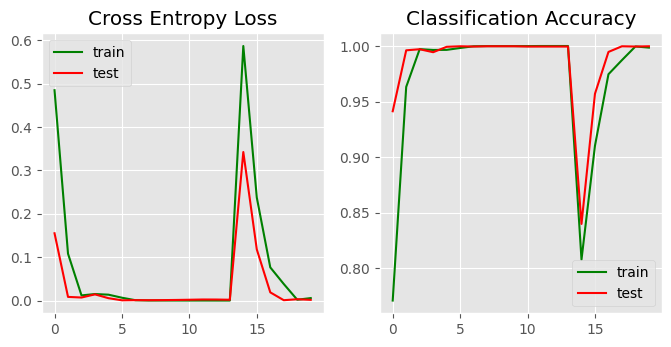

In [ ]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.style.use('ggplot')
    pyplot.figure(figsize=(8,8))
    pyplot.subplot(2,2,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='red', label='test')
    pyplot.legend()
#     pyplot.show()
    # plot accuracy
    pyplot.subplot(2,2,2)
#     pyplot.figure(figsize=(10,6))
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='red', label='test')
    pyplot.legend()
    pyplot.show()
summarize_diagnostics(history_alexnet)

In [ ]:
alexnet.save('/content/drive/MyDrive/trained_model/parking_smart/pretrained_alexnet_60%_71x71_ori_architecture.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# lenet

In [ ]:
# Building the Model Architecture
lenet = Sequential()
lenet.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(71,71,3)))
lenet.add(MaxPooling2D(pool_size=(2, 2)))
lenet.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
lenet.add(MaxPooling2D(pool_size=(2, 2)))
lenet.add(Flatten())
lenet.add(Dense(120, activation='relu'))
lenet.add(Dense(84, activation='relu'))
lenet.add(Dense(3, activation='softmax'))
lenet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 67, 67, 6)         456       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 33, 33, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 16)        2416      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 3136)              0         
                                                                 
 dense_18 (Dense)            (None, 120)              

In [ ]:
lenet.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
history_lenet = lenet.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=20,batch_size=128)

Epoch 1/20
97/97 [==============================] - 7s 29ms/step - loss: 0.2714 - accuracy: 0.8839 - val_loss: 0.2411 - val_accuracy: 0.8972
Epoch 2/20
97/97 [==============================] - 2s 20ms/step - loss: 0.1110 - accuracy: 0.9637 - val_loss: 0.0765 - val_accuracy: 0.9685
Epoch 3/20
97/97 [==============================] - 2s 18ms/step - loss: 0.0423 - accuracy: 0.9885 - val_loss: 0.0245 - val_accuracy: 0.9947
Epoch 4/20
97/97 [==============================] - 2s 16ms/step - loss: 0.0224 - accuracy: 0.9947 - val_loss: 0.0068 - val_accuracy: 0.9995
Epoch 5/20
97/97 [==============================] - 2s 26ms/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 6/20
97/97 [==============================] - 3s 32ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0127 - val_accuracy: 0.9998
Epoch 7/20
97/97 [==============================] - 2s 22ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 8/20
97

In [ ]:
lenet.save('/content/drive/MyDrive/trained_model/parking_smart/lenet_model_60%_71x71_architecture.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


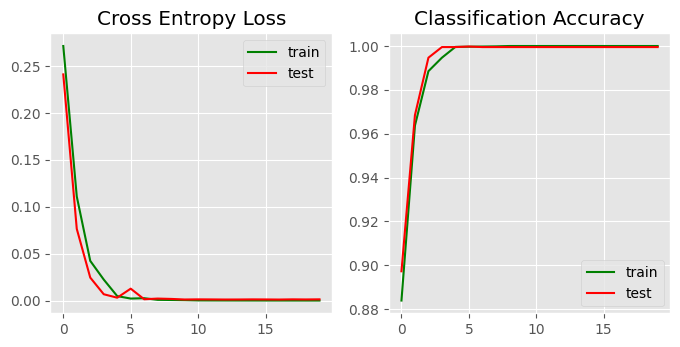

In [ ]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.style.use('ggplot')
    pyplot.figure(figsize=(8,8))
    pyplot.subplot(2,2,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='red', label='test')
    pyplot.legend()
#     pyplot.show()
    # plot accuracy
    pyplot.subplot(2,2,2)
#     pyplot.figure(figsize=(10,6))
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='red', label='test')
    pyplot.legend()
    pyplot.show()
summarize_diagnostics(history_lenet)

# CNN model

In [ ]:
model = Sequential()   # include depthwise 2D layer
model.add(Conv2D(32,(3,3),input_shape=(71,71,3)))
model.add(DepthwiseConv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(7,7),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 69, 69, 32)        896       
                                                                 
 depthwise_conv2d_6 (Depthw  (None, 13, 13, 32)        32800     
 iseConv2D)                                                      
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 64)          100416    
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 64)          0         
 D)                                                              
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:
model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
history4 = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=20,batch_size=128)

Epoch 1/20
97/97 [==============================] - 8s 65ms/step - loss: 0.3594 - accuracy: 0.8384 - val_loss: 0.2718 - val_accuracy: 0.8832
Epoch 2/20
97/97 [==============================] - 6s 57ms/step - loss: 0.1583 - accuracy: 0.9341 - val_loss: 0.1069 - val_accuracy: 0.9602
Epoch 3/20
97/97 [==============================] - 5s 56ms/step - loss: 0.0751 - accuracy: 0.9703 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 4/20
97/97 [==============================] - 6s 60ms/step - loss: 0.0266 - accuracy: 0.9930 - val_loss: 0.0075 - val_accuracy: 0.9995
Epoch 5/20
97/97 [==============================] - 6s 59ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 0.0042 - val_accuracy: 0.9995
Epoch 6/20
97/97 [==============================] - 6s 59ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 7/20
97/97 [==============================] - 6s 60ms/step - loss: 8.3500e-04 - accuracy: 0.9999 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 8/2

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

129/129 [==============================] - 1s 7ms/step - loss: 0.0080 - accuracy: 0.9995
test_acc: 0.999515175819397


In [ ]:
model.save('/content/drive/MyDrive/trained_model/parking_smart/proposed_model_60%_71x71_2_architecture.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


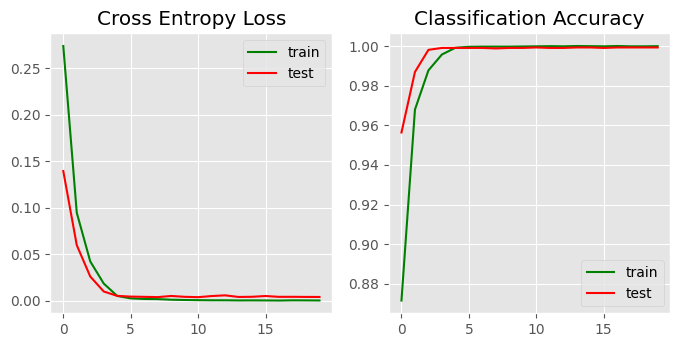

In [ ]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.style.use('ggplot')
    pyplot.figure(figsize=(8,8))
    pyplot.subplot(2,2,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='red', label='test')
    pyplot.legend()
#     pyplot.show()
    # plot accuracy
    pyplot.subplot(2,2,2)
#     pyplot.figure(figsize=(10,6))
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='red', label='test')
    pyplot.legend()
    pyplot.show()
summarize_diagnostics(history4)

In [ ]:
model.save('/content/drive/MyDrive/trained_model/parking_smart/dep_cnn60%2_sp_20%test.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
